In [2]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



import matplotlib.pyplot as plt



In [3]:
raw_data = pd.read_csv('mushrooms.csv')
dropna_data = raw_data.dropna(axis=0, how='any')

In [4]:
columns = dropna_data.columns.values
columns
# Attribute Information: (classes: edible=e, poisonous=p)

# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

# bruises: bruises=t,no=f

# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

# gill-attachment: attached=a,descending=d,free=f,notched=n

# gill-spacing: close=c,crowded=w,distant=d

# gill-size: broad=b,narrow=n

# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

# stalk-shape: enlarging=e,tapering=t

# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# veil-type: partial=p,universal=u

# veil-color: brown=n,orange=o,white=w,yellow=y

# ring-number: none=n,one=o,two=t

# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

array(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'], dtype=object)

<ipython-input-5-9a7f936eabdd>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  autolabel(plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list))


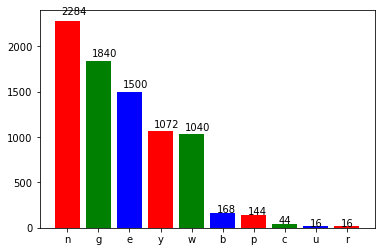

In [5]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.2, 1.03*height, '%s' % int(height))
        
        
name_list = dropna_data['cap-color'].value_counts().index
num_list = dropna_data['cap-color'].value_counts()
autolabel(plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list))
plt.show()


<ipython-input-6-ddb8d6685b7d>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  autolabel(plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list))


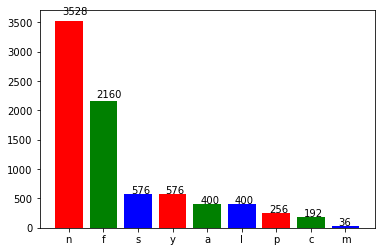

In [6]:
name_list = dropna_data['odor'].value_counts().index
num_list = dropna_data['odor'].value_counts()
autolabel(plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list))
plt.show()


In [7]:
def encoding(x):
    temp = list(dropna_data[x].value_counts().index)
    dic = {}
    index = 0
    result = []
    for i in temp:
        dic[i] = index
        index +=1
    for j in dropna_data[x]:
        result.append(dic[j])
    return result
        

In [8]:
data = pd.DataFrame()
for i in columns:
    number_list = encoding(i)
    data[i] = number_list

In [25]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.034451,-0.159155,0.011735,-0.501530,0.323569,-0.129200,-0.348387,0.540024,-0.334999,...,0.182342,0.133658,0.133722,NaN,-0.120766,-0.152261,0.556515,-0.025285,-0.446307,0.078160
cap-shape,-0.034451,1.000000,-0.058042,0.029639,-0.057287,0.017134,0.126426,-0.005866,0.083962,-0.016882,...,-0.059609,-0.019245,-0.004047,NaN,0.139236,0.195835,-0.082190,-0.119942,0.094009,0.216553
cap-surface,-0.159155,-0.058042,1.000000,-0.009187,-0.088630,-0.201957,0.005364,0.312855,-0.168927,0.136293,...,-0.060242,-0.016559,-0.012579,NaN,0.006500,-0.004239,-0.044634,0.138218,0.092017,-0.135708
cap-color,0.011735,0.029639,-0.009187,1.000000,0.108773,0.220801,-0.150855,0.115640,-0.088396,0.139617,...,0.050341,-0.093657,-0.081589,NaN,-0.140329,0.213419,0.038023,0.124321,0.195487,0.155114
bruises,-0.501530,-0.057287,-0.088630,0.108773,1.000000,0.067419,-0.137359,-0.299473,-0.369596,0.179959,...,-0.303546,-0.168188,-0.185653,NaN,-0.125606,0.014367,-0.685119,0.094309,0.071736,0.010061
odor,0.323569,0.017134,-0.201957,0.220801,0.067419,1.000000,-0.065285,-0.140206,0.433342,-0.100251,...,0.036040,-0.188523,-0.203276,NaN,-0.113019,-0.088455,-0.083359,-0.097657,-0.011620,0.158634
gill-attachment,-0.129200,0.126426,0.005364,-0.150855,-0.137359,-0.065285,1.000000,-0.071489,-0.108984,0.303533,...,-0.058385,0.460462,0.444346,NaN,0.842230,0.049642,-0.073149,0.362890,0.193065,0.146291
gill-spacing,-0.348387,-0.005866,0.312855,0.115640,-0.299473,-0.140206,-0.071489,1.000000,-0.108333,0.122796,...,0.120523,-0.275012,-0.247624,NaN,-0.034235,0.206233,-0.038015,-0.068113,0.433383,-0.115027
gill-size,0.540024,0.083962,-0.168927,-0.088396,-0.369596,0.433342,-0.108984,-0.108333,1.000000,-0.482295,...,-0.074886,-0.274632,-0.228869,NaN,-0.074866,-0.190112,0.071459,-0.464968,-0.396480,0.118962
gill-color,-0.334999,-0.016882,0.136293,0.139617,0.179959,-0.100251,0.303533,0.122796,-0.482295,1.000000,...,-0.044905,0.241009,0.227199,NaN,0.278562,0.126014,-0.072866,0.416107,0.375137,0.075706


In [32]:
def visualize_data(x):
    data = x.values
 
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111)
 
    heatmap = ax.pcolor(data,cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0] + 0.5),minor = False)
    ax.set_yticks(np.arange(data.shape[1]  + 0.5),minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
 
    column_labels = x.columns
    row_labels = x.index
 
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
 
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
 


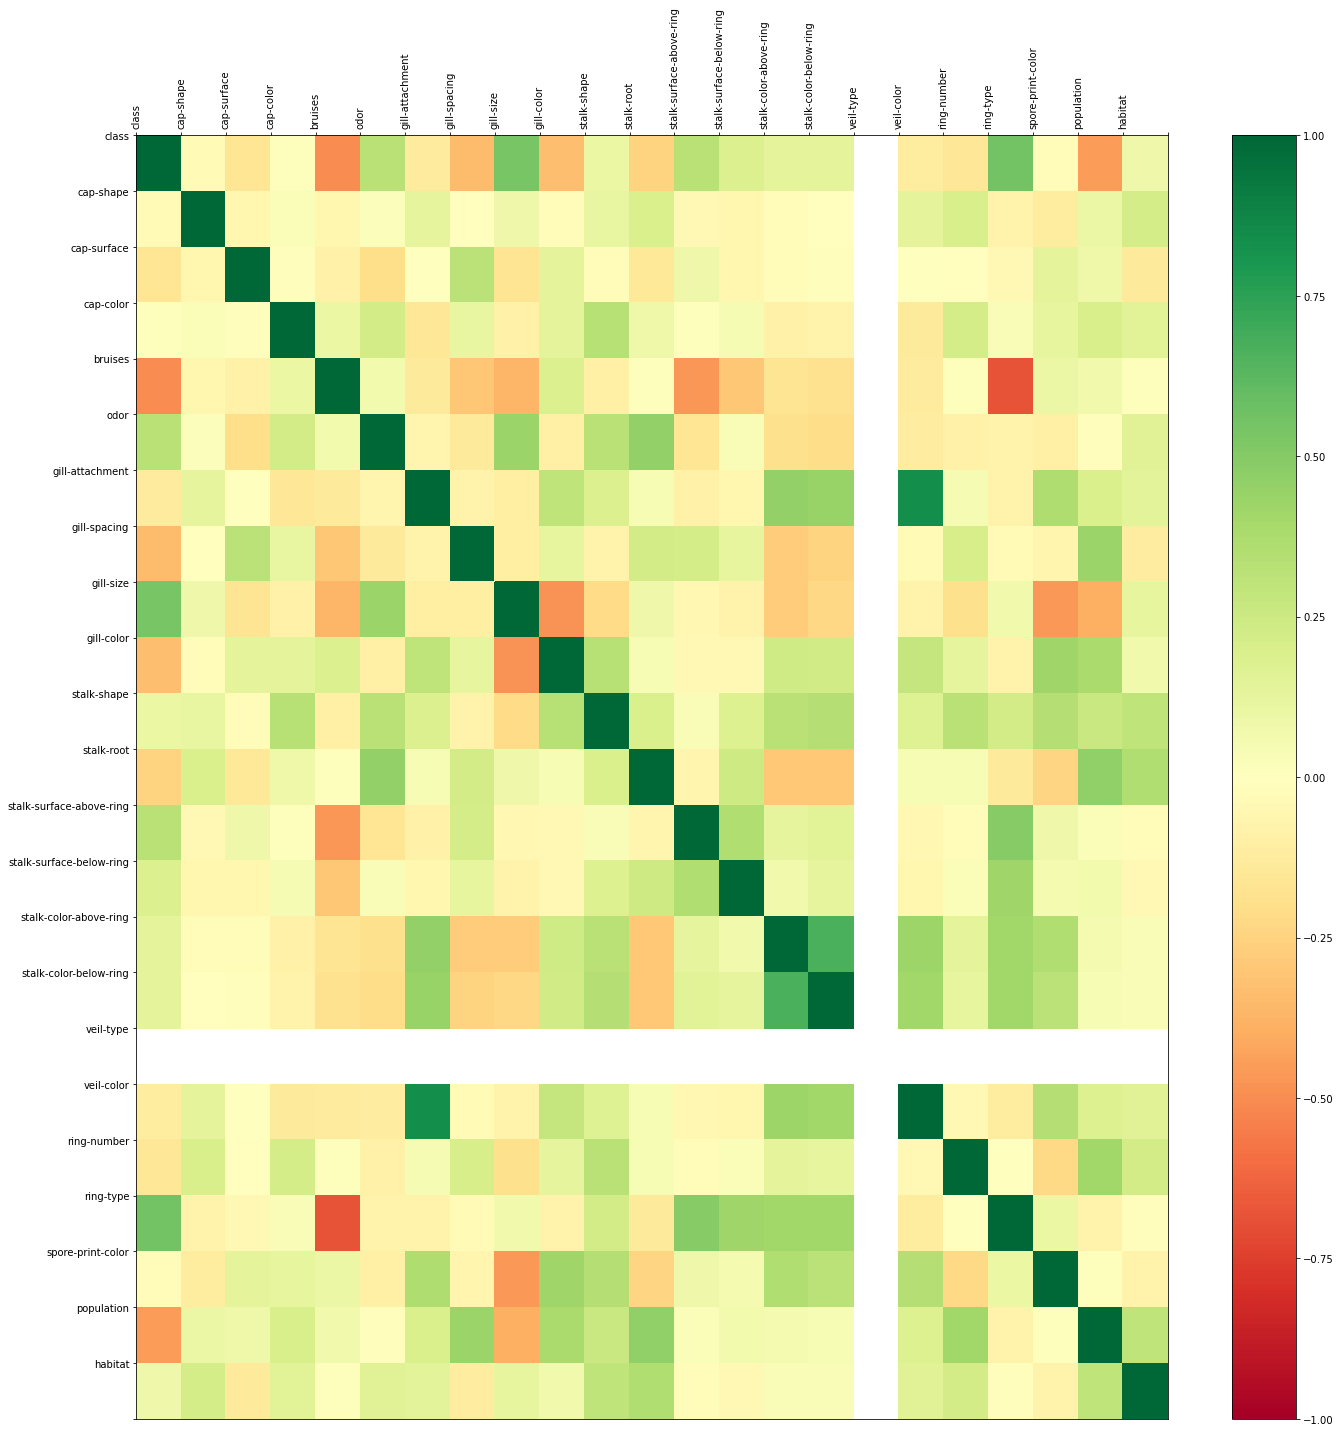

In [33]:
visualize_data(data.corr())

In [45]:
data.drop(['bruises'], axis=1)
data_data = data[columns[1:]].values
data_label= data[columns[0]].values  


In [46]:
len(data_data)

8124

In [47]:
 #edible=e=0, poisonous=p=1

In [49]:
x_train, x_test,y_train,y_test = train_test_split(data_data, data_label, test_size=0.5,random_state=15)

pca = PCA(n_components=20,whiten=True, random_state= 32)



In [50]:
print(x_train[1].shape)

(22,)


In [51]:
x_train.shape

(4062, 22)

In [60]:
print('-----------------svm------------------------------')

svc = SVC(kernel='rbf',class_weight='balanced')



model = make_pipeline(pca, svc)


param_grid = {'svc__C': [7,9,11],
              'svc__gamma': [0.1,0.5,1]}
grid = GridSearchCV(model, param_grid)
print(x_train.shape, y_train.shape)
grid.fit(x_train, y_train) #bulid model

print(grid.best_params_) #show the best parameters

model = grid.best_estimator_  #pick up the best model

yfit = model.predict(x_test)  #use the best model
# fig, ax = plt.subplots(4, 6)
# for i, axi in enumerate(ax.flat):
#     axi.imshow(x_test[i].reshape(22), cmap='bone')
#     axi.set(xticks=[], yticks=[])
#     axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
#                    color='black' if yfit[i] == y_test[i] else 'red')
# fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
# fig.show()


print(classification_report(y_test, yfit,
                            target_names=['edible', 'poisonous']))
f1 = f1_score(y_test, yfit, average='binary')
a = confusion_matrix(y_test, yfit)
print(f1)
print(a)

-----------------svm------------------------------
(4062, 22) (4062,)
{'svc__C': 7, 'svc__gamma': 0.1}
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      2133
   poisonous       1.00      1.00      1.00      1929

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

0.9997407311381903
[[2133    0]
 [   1 1928]]


In [53]:
print('-----------------randomforest------------------------------')

clf = RandomForestClassifier(random_state=0)


model1 = make_pipeline(pca, clf)

# param_grid = [
# {'n_estimators': [1,2,3], 'max_features': [20,21,22]}
# ]

param_grid = [
{'n_estimators': [1,2,3]}
]


grid_search = GridSearchCV(clf, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

print(x_train.shape, y_train.shape)

grid_search.fit(x_train, y_train) #build model

print(grid_search.best_params_) #show the best parameters

model1 = grid_search.best_estimator_  #pick up the best model

yfit = model1.predict(x_test)  #use the best model
# fig, ax = plt.subplots(4, 6)
# for i, axi in enumerate(ax.flat):
#     axi.imshow(x_test[i].reshape(22), cmap='bone')
#     axi.set(xticks=[], yticks=[])
#     axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
#                    color='black' if yfit[i] == y_test[i] else 'red')
# fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
# fig.show()


print(classification_report(y_test, yfit,
                            target_names=['edible', 'poisonous']))
f1 = f1_score(y_test, yfit, average='binary')
a = confusion_matrix(y_test, yfit)
print(f1)
print(a)

-----------------randomforest------------------------------
(4062, 22) (4062,)
{'n_estimators': 3}
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      2133
   poisonous       1.00      1.00      1.00      1929

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

0.9987023098883987
[[2133    0]
 [   5 1924]]


In [54]:
print(model1.feature_importances_)

[0.000953   0.00539851 0.06849629 0.00057451 0.27318584 0.
 0.00028443 0.11608979 0.09398737 0.09765874 0.00554243 0.01227082
 0.00332788 0.00028963 0.01112092 0.         0.         0.
 0.21442257 0.05097382 0.03397122 0.01145224]


In [55]:
print(columns[5+1])
print(columns[11+1])
print(columns[20+1])

gill-attachment
stalk-surface-above-ring
population


In [56]:
print('-----------------lr------------------------------')

lr = LogisticRegression(class_weight='balanced',penalty = 'l2',C = 1)


model2 = make_pipeline(pca, lr)

# param_grid = {}


# grid_search = GridSearchCV(clf, param_grid, cv=5,
#                           scoring='neg_mean_squared_error')

# print(x_train.shape, y_train.shape)

model2.fit(x_train, y_train) #bulid model



yfit = model2.predict(x_test)  #
# fig, ax = plt.subplots(4, 6)
# for i, axi in enumerate(ax.flat):
#     axi.imshow(x_test[i].reshape(22), cmap='bone')
#     axi.set(xticks=[], yticks=[])
#     axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
#                    color='black' if yfit[i] == y_test[i] else 'red')
# fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
# fig.show()


print(classification_report(y_test, yfit,
                            target_names=['edible', 'poisonous']))
f1 = f1_score(y_test, yfit, average='binary')
a = confusion_matrix(y_test, yfit)
print(f1)
print(a)

-----------------lr------------------------------
              precision    recall  f1-score   support

      edible       0.99      0.99      0.99      2133
   poisonous       0.99      0.98      0.99      1929

    accuracy                           0.99      4062
   macro avg       0.99      0.99      0.99      4062
weighted avg       0.99      0.99      0.99      4062

0.9862301896596518
[[2111   22]
 [  31 1898]]


In [57]:
svm_10_fold = cross_val_score(model, data_data, data_label, cv=10)
rf_10_fold = cross_val_score(model1, data_data, data_label, cv=10)
lr_10_fold = cross_val_score(model2, data_data, data_label, cv=10)


print('svm 10-fold correct prediction: {:4.4f}'.format(np.mean(svm_10_fold)))
print('randomforest 10-fold correct prediction: {:4.4f}'.format(np.mean(rf_10_fold)))
print('lr 10-fold correct prediction: {:4.4f}'.format(np.mean(lr_10_fold)))


svm 10-fold correct prediction: 0.8977
randomforest 10-fold correct prediction: 0.9626
lr 10-fold correct prediction: 0.9633
